In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from contractions import fix

# Descargar recursos (ejecutar una vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# EDA y NLP

- 02_user_review_NLP.parquet

In [2]:
# Direccion del archivo comprimido y reconvertido
user_reviews_content = 'data/02_user_reviews_NLP.parquet'

# Cargar directamente el archivo comprimido en un DataFrame
user_reviews_dataset = pd.read_parquet(user_reviews_content)

- 02_users_items_final.parquet

In [3]:
# Direccion del archivo comprimido y reconvertido
users_items_content = 'data/02_users_items_final.parquet'

# Cargar directamente el archivo comprimido en un DataFrame
users_items_dataset = pd.read_parquet(users_items_content)

- 02_steam_games_final.parquet

In [4]:
# Direccion del archivo comprimido y reconvertido
steam_games_content = 'data/02_steam_games_final.parquet'

# Cargar directamente el archivo comprimido en un DataFrame
steam_games_dataset = pd.read_parquet(steam_games_content)

### Análisis Combinado

Comparativa user_reviews_dataset

In [5]:
user_reviews_dataset.head()

,user_id,item_id,posted,recommend,sentiment_analysis
0,76561197970982479,1250,"Posted November 5, 2011.",True,2
1,76561197970982479,22200,"Posted July 15, 2011.",True,2
2,76561197970982479,43110,"Posted April 21, 2011.",True,2
3,js41637,251610,"Posted June 24, 2014.",True,2
4,js41637,227300,"Posted September 8, 2013.",True,2


In [6]:
user_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59305 non-null  object
 1   item_id             59305 non-null  int64 
 2   posted              59305 non-null  object
 3   recommend           59305 non-null  bool  
 4   sentiment_analysis  59305 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 1.9+ MB


In [7]:
# Convertir valores de 'recommend' a valores booleanos
user_reviews_dataset['recommend'] = user_reviews_dataset['recommend'].astype(bool)

In [8]:
# Mostrar solo las filas con valor 'False' en la columna 'recommend'
filas_false = user_reviews_dataset[user_reviews_dataset['recommend'] == False]

# Mostrar las primeras filas con valor 'False' usando head()
filas_false.head()

,user_id,item_id,posted,recommend,sentiment_analysis
48,76561198043472122,33440,"Posted December 19, 2014.",False,1
62,76561198066046412,359320,"Posted December 28, 2015.",False,0
68,76561198070565427,570,"Posted June 27, 2014.",False,1
84,boydeer,383080,"Posted August 24, 2015.",False,1
122,sandwiches1,417860,"Posted November 23, 2015.",False,1


In [9]:
# Calcular la cantidad de valores True y False en la columna 'recommend'
total_count = len(user_reviews_dataset)
print("Cantidad total de Filas:", total_count)

# Contar la cantidad de valores 'False' en la columna 'recommend'
false_count = (user_reviews_dataset['recommend'] == False).sum()
print("Cantidad de valores 'False' en la columna 'recommend':", false_count)

# Contar la cantidad de valores 'True' en la columna 'recommend'
true_count = (user_reviews_dataset['recommend'] == True).sum()
print("Cantidad de valores 'True' en la columna 'recommend':", true_count)

# Contar la cantidad de celdas vacias en 'recommend'
celdas_vacias_por_columna = user_reviews_dataset['recommend'].isnull().sum()
print("Cantidad celdas vacias en 'recommend':",celdas_vacias_por_columna)

# Contar la cantidad de NaN vacias en 'recommend'
celdas_nan_por_columna = user_reviews_dataset['recommend'].isna().sum()
print("Cantidad celdas NaN en 'recommend':",celdas_nan_por_columna)

# Calcular porcentajes
true_percentage = (true_count / total_count) * 100
false_percentage = (false_count / total_count) * 100
print(f"Porcentaje de True: {true_percentage:.2f}%")
print(f"Porcentaje de False: {false_percentage:.2f}%")

Cantidad total de Filas: 59305
Cantidad de valores 'False' en la columna 'recommend': 6832
Cantidad de valores 'True' en la columna 'recommend': 52473
Cantidad celdas vacias en 'recommend': 0
Cantidad celdas NaN en 'recommend': 0
Porcentaje de True: 88.48%
Porcentaje de False: 11.52%


In [10]:
# Calcular el número de filas donde 'recommend' es True y 'sentiment_analysis' es 2 (positivo)
true_positive = len(user_reviews_dataset[(user_reviews_dataset['recommend'] == True) & (user_reviews_dataset['sentiment_analysis'] == 2)])
# Calcular el número de filas donde 'recommend' es True y 'sentiment_analysis' es 2 (positivo) y 1 (neutro)
true_pos_neut = len(user_reviews_dataset[((user_reviews_dataset['recommend'] == True) & ((user_reviews_dataset['sentiment_analysis'] == 2) | (user_reviews_dataset['sentiment_analysis'] == 1)))])
# Calcular el número de filas donde 'recommend' es True y 'sentiment_analysis' es 0 (negativo)
true_negative = len(user_reviews_dataset[(user_reviews_dataset['recommend'] == True) & (user_reviews_dataset['sentiment_analysis'] == 0)])
# Calcular el número de filas donde 'recommend' es True y 'sentiment_analysis' es 2 (positivo) y 1 (neutro)
true_neut = len(user_reviews_dataset[((user_reviews_dataset['recommend'] == True) & (user_reviews_dataset['sentiment_analysis'] == 1))])

# Calcular el número de filas donde 'recommend' es False y 'sentiment_analysis' es 0 (negativo)
false_negative = len(user_reviews_dataset[(user_reviews_dataset['recommend'] == False) & (user_reviews_dataset['sentiment_analysis'] == 0)])
# Calcular el número de filas donde 'recommend' es False y 'sentiment_analysis' es 0 (negativo) y 1 (neutro)
false_neg_neut = len(user_reviews_dataset[((user_reviews_dataset['recommend'] == False) & ((user_reviews_dataset['sentiment_analysis'] == 0) | (user_reviews_dataset['sentiment_analysis'] == 1)))])
# Calcular el número de filas donde 'recommend' es False y 'sentiment_analysis' es 2 (positivo)
false_positive = len(user_reviews_dataset[(user_reviews_dataset['recommend'] == False) & (user_reviews_dataset['sentiment_analysis'] == 2)])
# Calcular el número de filas donde 'recommend' es False y 'sentiment_analysis' es  1 (neutro)
false_neut = len(user_reviews_dataset[((user_reviews_dataset['recommend'] == False) & (user_reviews_dataset['sentiment_analysis'] == 1))])

# Calcular el número total de filas en el DataFrame
total_rows = len(user_reviews_dataset)

# Calcular el porcentaje de correspondencia 
correspondence_percentage_pos = ((true_positive) / total_rows) * 100
correspondence_percentage_pos_neut = ((true_pos_neut) / total_rows) * 100
correspondence_percentage_tru_neg = ((true_negative) / total_rows) * 100
correspondence_percentage_tru_neut = ((true_neut) / total_rows) * 100


correspondence_percentage_neg = ((false_negative) / total_rows) * 100
correspondence_percentage_neg_neut = ((false_neg_neut) / total_rows) * 100
correspondence_percentage_false_pos = ((false_positive) / total_rows) * 100
correspondence_percentage_false_neut = ((false_neut) / total_rows) * 100


print(f"El porcentaje de correspondencia true-positivo es: {correspondence_percentage_pos:.2f}%")
print(f"El porcentaje de correspondencia true-positivo+neutro es: {correspondence_percentage_pos_neut:.2f}%")
print(f"El porcentaje de correspondencia true-negativo es: {correspondence_percentage_tru_neg:.2f}%")
print(f"El porcentaje de correspondencia true-neut es: {correspondence_percentage_tru_neut:.2f}%")

print(f"El porcentaje de correspondencia false-negativo es: {correspondence_percentage_neg:.2f}%")
print(f"El porcentaje de correspondencia false-negativo+neutro es: {correspondence_percentage_neg_neut:.2f}%")
print(f"El porcentaje de correspondencia false-positive es: {correspondence_percentage_false_pos:.2f}%")
print(f"El porcentaje de correspondencia false-neutro es: {correspondence_percentage_false_neut:.2f}%")

El porcentaje de correspondencia true-positivo es: 58.00%
El porcentaje de correspondencia true-positivo+neutro es: 76.82%
El porcentaje de correspondencia true-negativo es: 11.66%
El porcentaje de correspondencia true-neut es: 18.82%
El porcentaje de correspondencia false-negativo es: 4.83%
El porcentaje de correspondencia false-negativo+neutro es: 7.28%
El porcentaje de correspondencia false-positive es: 4.24%
El porcentaje de correspondencia false-neutro es: 2.45%


In [11]:
total_rows = len(user_reviews_dataset)

conditions = {
    'true_positive': sum(user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 2)),
    'true_pos_neut': sum(user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] >= 1)),
    'true_negative': sum(~user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 0)),
    'true_neut': sum(user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 1)),
    'false_negative': sum(~user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 0)),
    'false_neg_neut': sum(~user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] >= 1)),
    'false_positive': sum(user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 2)),
    'false_neut': sum(~user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 1))
}

correspondence_percentage = {key: (value / total_rows) * 100 for key, value in conditions.items()}

for key, value in correspondence_percentage.items():
    print(f"El porcentaje de correspondencia {key.replace('_', '-')} es: {value:.2f}%")


El porcentaje de correspondencia true-positive es: 58.00%
El porcentaje de correspondencia true-pos-neut es: 76.82%
El porcentaje de correspondencia true-negative es: 4.83%
El porcentaje de correspondencia true-neut es: 18.82%
El porcentaje de correspondencia false-negative es: 4.83%
El porcentaje de correspondencia false-neg-neut es: 6.69%
El porcentaje de correspondencia false-positive es: 58.00%
El porcentaje de correspondencia false-neut es: 2.45%


In [12]:
total_rows = len(user_reviews_dataset)

combinaciones = {
    'true_positive': lambda data_rev: (data_rev['recommend'] & (data_rev['sentiment_analysis'] == 2)).sum(),
    #'true_pos_neut': lambda data_rev: (data_rev['recommend'] & (data_rev['sentiment_analysis'] >= 1)).sum(),
    'true_negative': lambda data_rev: ((data_rev['recommend']) & (data_rev['sentiment_analysis'] == 0)).sum(),
    'true_neutral': lambda data_rev: (data_rev['recommend'] & (data_rev['sentiment_analysis'] == 1)).sum(),
    'false_negative': lambda data_rev: ((~data_rev['recommend']) & (data_rev['sentiment_analysis'] == 0)).sum(),
    #'false_neg_neut': lambda data_rev: ((~data_rev['recommend']) & (data_rev['sentiment_analysis'] >= 1)).sum(),
    'false_positive': lambda data_rev: (~data_rev['recommend'] & (data_rev['sentiment_analysis'] == 2)).sum(),
    'false_neutral': lambda data_rev: ((~data_rev['recommend']) & (data_rev['sentiment_analysis'] == 1)).sum()
}

conditions = {key: func(user_reviews_dataset) for key, func in combinaciones.items()}
correspondence_percentage = {key: (value / total_rows) * 100 for key, value in conditions.items()}

for key, value in correspondence_percentage.items():
    print(f"El porcentaje de correspondencia {key.replace('_', '-')} es: {value:.2f}%")


El porcentaje de correspondencia true-positive es: 58.00%
El porcentaje de correspondencia true-negative es: 11.66%
El porcentaje de correspondencia true-neutral es: 18.82%
El porcentaje de correspondencia false-negative es: 4.83%
El porcentaje de correspondencia false-positive es: 4.24%
El porcentaje de correspondencia false-neutral es: 2.45%


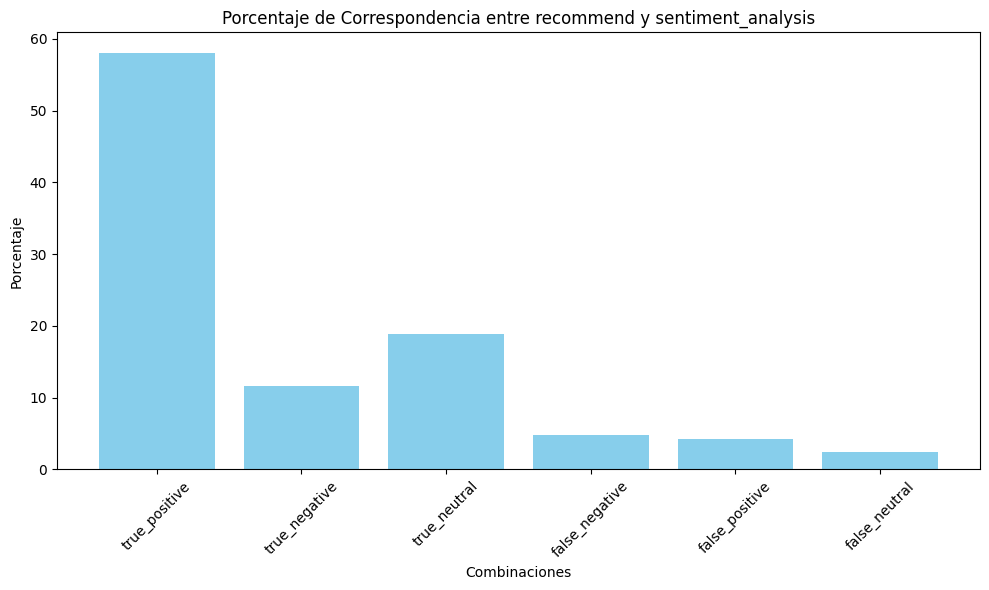

In [13]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(correspondence_percentage.keys(), correspondence_percentage.values(), color='skyblue')

# Títulos y etiquetas
plt.title('Porcentaje de Correspondencia entre recommend y sentiment_analysis')
plt.xlabel('Combinaciones')
plt.ylabel('Porcentaje')

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La conclusiones a emitir a partir de la exploracion por NLP son varias:
Por un lado se puede decir que probablemente el análisis de sentimientos no sea del todo exacto, además se sabe que vader no capta del todo bien las ironías o dobles sentidos y ya que depende de las palabras individuales y su valor de polaridad, puede no entender completamente el texto. 
Tambien se puede ver que muchas de las recomendaciones fueron hechas aunque las reviews no fueron tan buenas (neut), ya que la correspondencia entre recommend=true y review=positiva es solo del 58%, mientras que adosando los registros neutros a la cuenta aumenta bastasnte. Tambien las se puede ver que se han recomendado juegos, aún teniendo una review negativa y contrariamente no se an recomendado juegos a pesar de tener una review positiva. Las reviews neutras particularmente han favorecido a la recomendacion. Según el gráfico claramente tendieron a recomendar los juegos

* Grafico las el analisis por sentimiento de las reviews

<Axes: xlabel='sentiment_analysis', ylabel='Count'>

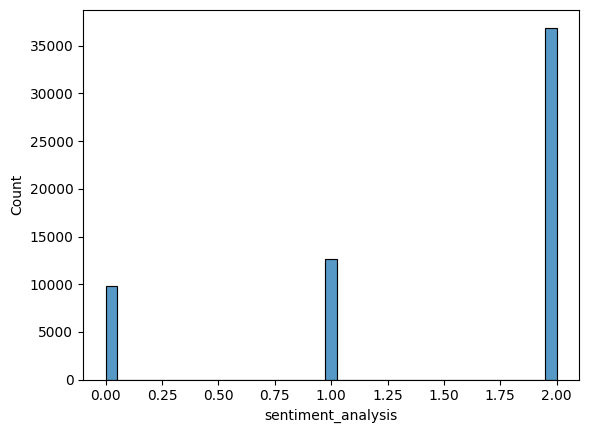

In [14]:
sns.histplot(data=user_reviews_dataset,x='sentiment_analysis')

<Axes: ylabel='playtime_forever'>

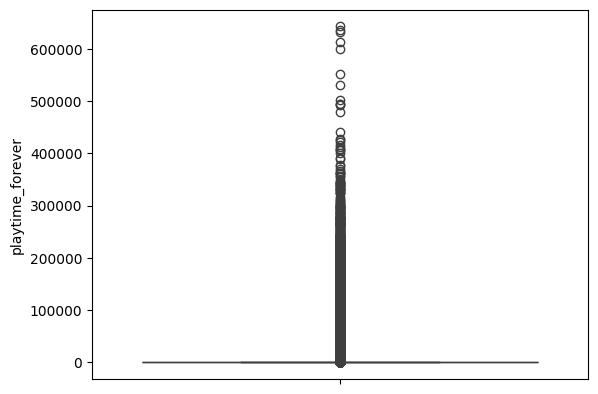

In [15]:
sns.boxplot(data=users_items_dataset,y='playtime_forever') # Hago un diagrama de caja para ver outliers

In [16]:
steam_games_dataset.head()

,app_name,id,release_date,genres,specs,price,publisher,developer
0,Lost Summoner Kitty,761140,2018-01-04,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",['Single-player'],4.99,Kotoshiro,Kotoshiro
1,Ironbound,643980,2018-01-04,"['Free to Play', 'Indie', 'RPG', 'Strategy']","['Single-player', 'Multi-player', 'Online Mult...",0.00,"Making Fun, Inc.",Secret Level SRL
2,Real Pool 3D - Poolians,670290,2017-07-24,"['Casual', 'Free to Play', 'Indie', 'Simulatio...","['Single-player', 'Multi-player', 'Online Mult...",0.00,Poolians.com,Poolians.com
3,弹炸人2222,767400,2017-12-07,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,彼岸领域,彼岸领域
4,Battle Royale Trainer,772540,2018-01-04,"['Action', 'Adventure', 'Simulation']","['Single-player', 'Steam Achievements']",3.99,Trickjump Games Ltd,Trickjump Games Ltd


In [17]:
steam_games_dataset = steam_games_dataset.drop(columns=['publisher','specs','genres'])

In [18]:
steam_games_dataset['release_year'] = steam_games_dataset['release_date'].str.extract(r'(\d{4})')

In [19]:
# Borramos las filas donde 'release_year' es NaN
steam_games_dataset.dropna(subset=['release_year'], inplace=True)

In [20]:
# Buscar NaN en la columna 'release_year'
valores_nulos_year = steam_games_dataset[steam_games_dataset['release_year'].isna()]

# Mostrar las filas
valores_nulos_year.head(10)

,app_name,id,release_date,price,developer,release_year


In [21]:
steam_games_dataset['release_year'] = steam_games_dataset['release_year'].astype(int)

In [22]:
steam_games_dataset.head()

,app_name,id,release_date,price,developer,release_year
0,Lost Summoner Kitty,761140,2018-01-04,4.99,Kotoshiro,2018
1,Ironbound,643980,2018-01-04,0.00,Secret Level SRL,2018
2,Real Pool 3D - Poolians,670290,2017-07-24,0.00,Poolians.com,2017
3,弹炸人2222,767400,2017-12-07,0.99,彼岸领域,2017
4,Battle Royale Trainer,772540,2018-01-04,3.99,Trickjump Games Ltd,2018


In [23]:
steam_games_dataset[['price','release_year']].describe()

,price,release_year
count,22528.000000,22528.000000
mean,8.968073,2014.669478
std,15.418669,3.515434
min,0.000000,1983.000000
25%,2.990000,2014.000000
50%,4.990000,2016.000000
75%,9.990000,2017.000000
max,995.000000,2021.000000


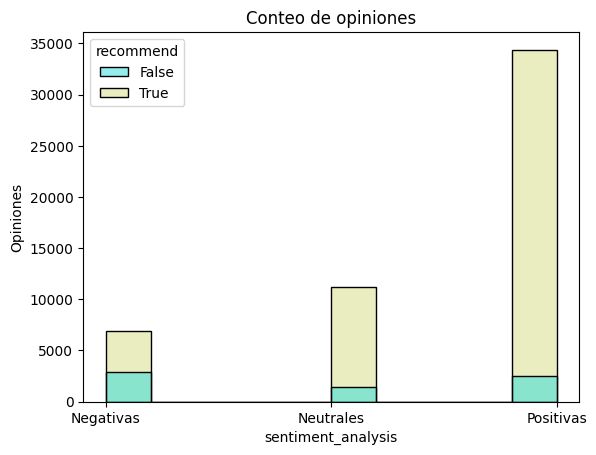

In [24]:
sns.histplot(data=user_reviews_dataset,x='sentiment_analysis',bins=10,palette='rainbow',hue='recommend')
plt.title('Conteo de opiniones')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'])
plt.ylabel('Opiniones')
plt.show()

In [25]:
users_items_dataset.head()

,user_id,item_name,item_id,playtime_forever
0,76561197970982479,Counter-Strike,10,6
1,76561197970982479,Team Fortress Classic,20,0
2,76561197970982479,Day of Defeat,30,7
3,76561197970982479,Deathmatch Classic,40,0
4,76561197970982479,Half-Life: Opposing Force,50,0


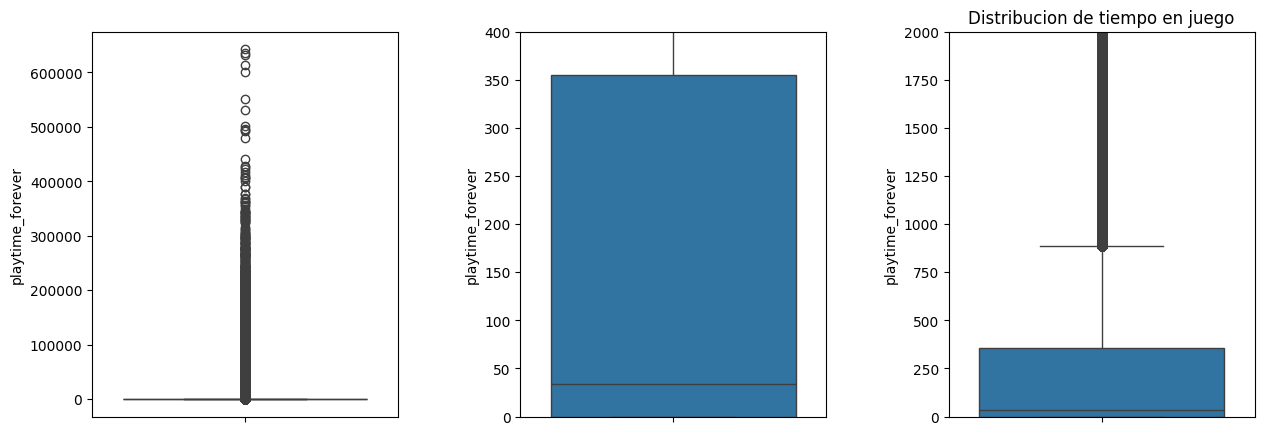

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=users_items_dataset, y='playtime_forever', ax=ax[0])
sns.boxplot(data=users_items_dataset, y='playtime_forever', ax=ax[1])
sns.boxplot(data=users_items_dataset, y='playtime_forever', ax=ax[2])
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 2000)
plt.title('Distribucion de tiempo en juego')
plt.subplots_adjust(wspace=0.4)
plt.show()


In [27]:
users_items_dataset.head()

,user_id,item_name,item_id,playtime_forever
0,76561197970982479,Counter-Strike,10,6
1,76561197970982479,Team Fortress Classic,20,0
2,76561197970982479,Day of Defeat,30,7
3,76561197970982479,Deathmatch Classic,40,0
4,76561197970982479,Half-Life: Opposing Force,50,0


In [28]:
users_items_agrupado = users_items_dataset.groupby('item_name')['playtime_forever'].sum().reset_index()
users_items_agrupado.sort_values('playtime_forever', ascending=False, inplace=True)
users_items_agrupado.head()

,item_name,playtime_forever
2117,Counter-Strike: Global Offensive,785184267
3944,Garry's Mod,448366616
9076,Terraria,154974541
9249,The Elder Scrolls V: Skyrim,136678626
10393,Warframe,124027703


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_9522/2219355832.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=users_items_agrupado.head(10), y='item_name', x='playtime_forever', palette='pastel')


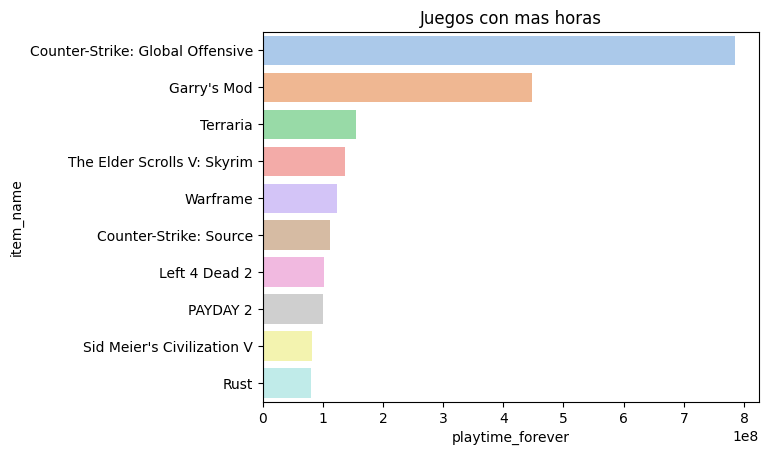

In [29]:
sns.barplot(data=users_items_agrupado.head(10), y='item_name', x='playtime_forever', palette='pastel')
plt.title('Juegos con mas horas')
plt.show()

In [30]:
# Agrupar por 'developer' y contar la cantidad de 'id' para cada uno
games_playtime_dev = steam_games_dataset.groupby('developer')['id'].count().reset_index()

# Renombrar la columna 'id' por 'id_count' para indicar la cantidad de IDs por desarrollador
games_playtime_dev.rename(columns={'id': 'games_count'}, inplace=True)
# Ordenar el DataFrame por 'id_count' en orden descendente
games_playtime_dev = games_playtime_dev.sort_values('games_count', ascending=False)
games_playtime_dev.head()

,developer,games_count
2566,Dovetail Games,253
4673,"KOEI TECMO GAMES CO., LTD.",180
9073,Ubisoft - San Francisco,178
1529,Capcom,107
6422,Paradox Development Studio,97


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_9522/3066094891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=games_playtime_dev.head(10), y='developer', x='games_count', palette='pastel')


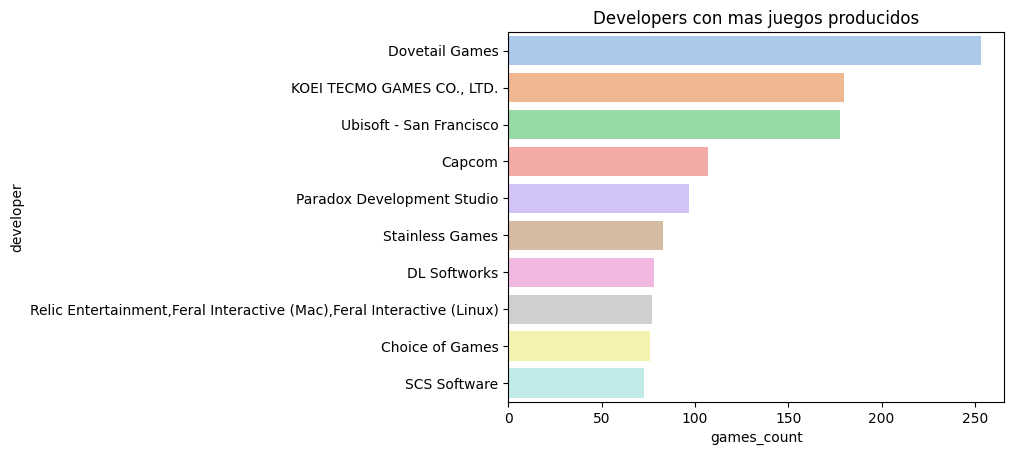

In [31]:
sns.barplot(data=games_playtime_dev.head(10), y='developer', x='games_count', palette='pastel')
plt.title('Developers con mas juegos producidos')
plt.show()

* Grafico las el analisis por sentimiento de las reviews

In [32]:

#Averiguamos los 3 juegos mas recomendados.

# Filtramos solo las filas con recommend=True
df_reviews_true = user_reviews_dataset[user_reviews_dataset['recommend']]

#Contamos la cantidad de recomendaciones por item_id
recomendaciones_por_item = user_reviews_dataset.groupby('item_id')['recommend'].count().reset_index()

#Ordenamos en orden descendente
recomendaciones_mas_por_item = recomendaciones_por_item.sort_values(by='recommend', ascending=False)
recomendaciones_menos_por_item = recomendaciones_por_item.sort_values(by='recommend', ascending=True)

#Tomamos los tres primeros ítems
top_3_mas_recomendados = recomendaciones_mas_por_item.head(3)
#Tomamos los tres primeros ítems
top_3_menos_recomendados = recomendaciones_menos_por_item.head(3)

#Combinamos con df_steam para obtener los nombres de los ítems

top_3_mas_recomendados = pd.merge(top_3_mas_recomendados, steam_games_dataset[['id', 'app_name']], left_on='item_id', right_on='id', how='left')

top_3_menos_recomendados = pd.merge(top_3_menos_recomendados, steam_games_dataset[['id', 'app_name']], left_on='item_id', right_on='id', how='left')

print(top_3_mas_recomendados)
print('\n')
print(top_3_menos_recomendados)



   item_id  recommend    id                          app_name
0      730       3759   730  Counter-Strike: Global Offensive
1      440       3736   440                   Team Fortress 2
2     4000       1735  4000                       Garry's Mod


   item_id  recommend      id            app_name
0   527340          1  527340       What The Box?
1   331160          1  331160   Disney•Pixar Cars
2   224900          1  224900  Iron Sky: Invasion


/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_9522/3763659097.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_mas_recomendados.head(10), y='app_name', x='recommend', palette='pastel')


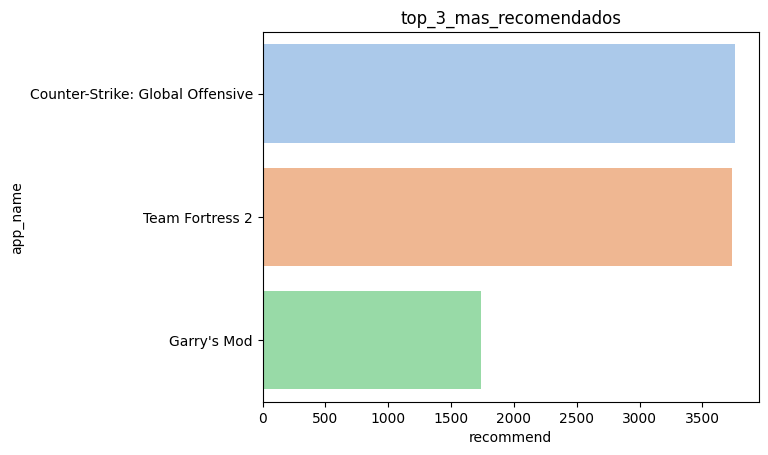

In [33]:
sns.barplot(data=top_3_mas_recomendados.head(10), y='app_name', x='recommend', palette='pastel')
plt.title('top_3_mas_recomendados')
plt.show()

/var/folders/0p/tsl8rn8x1vs7k18zw9s6dh0r0000gn/T/ipykernel_9522/3847533881.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_menos_recomendados.head(10), y='app_name', x='recommend', palette='pastel')


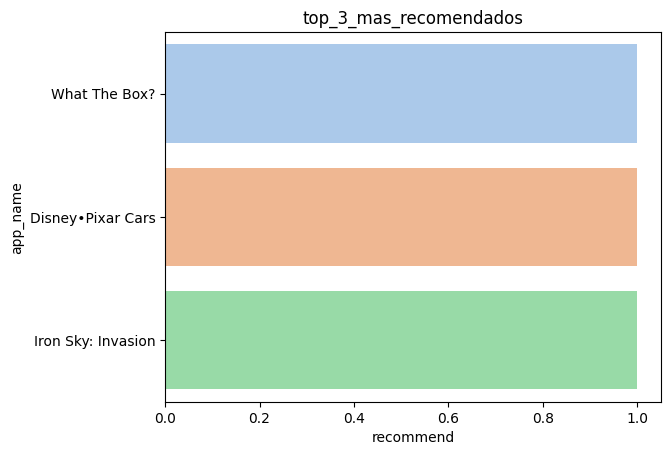

In [34]:
sns.barplot(data=top_3_menos_recomendados.head(10), y='app_name', x='recommend', palette='pastel')
plt.title('top_3_mas_recomendados')
plt.show()

In [35]:
top_juegos_jugados = users_items_dataset.sort_values(by='playtime_forever', ascending=False).head(10)

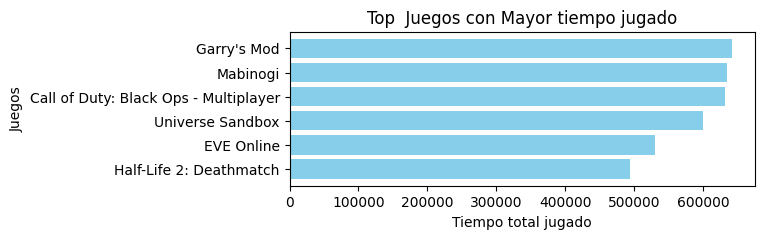

In [36]:
plt.figure(figsize=(6, 2))  # Ajusta el tamaño del gráfico..

# Graficar los datos
plt.barh(top_juegos_jugados['item_name'], top_juegos_jugados['playtime_forever'], color='skyblue')
plt.xlabel('Tiempo total jugado')  # Etiqueta del eje X
plt.ylabel('Juegos')         # Etiqueta del eje Y
plt.title('Top  Juegos con Mayor tiempo jugado')  # Título del gráfico

plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.

# Mostrar el gráfico
plt.show()